# K Nearest Neighbors (knn)

In [1]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn import metrics
from sklearn import model_selection
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Text(0,0.5,'Accuracy of classifier')

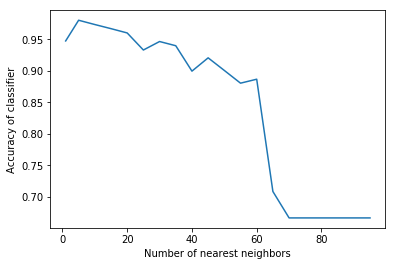

In [2]:
iris = pd.read_csv('iris.csv')
# Create a copy of this piece of data
iris_2 = iris[['sepal_length', 'sepal_width','pedal_length','pedal_width', 'class']].copy()

# Create a new 'target' column with all 0
iris_2['target'] = 0.0

# Mask the rows with Iris-setosa, and set them as the positive class
mask = iris_2['class'] == 'Iris-versicolor'
iris_2.loc[mask, 'target'] = 1.0

#Create design matrices
Y, X = dmatrices('target ~ 0 + sepal_length + sepal_width + pedal_length + pedal_width',
                 iris_2,return_type="dataframe")
y = Y['target'].values

# Varying model parameters
def cv_accuracy_score(X, y, nn):
    """For each fold, fit the nearest neighbors model
    with nn nearest neighbors on the train, and return accuracy
    on the test."""
    
    model = neighbors.KNeighborsClassifier(n_neighbors=nn,
                                           weights='uniform')
    accuracies = []
    
    kfold = model_selection.StratifiedKFold(n_splits=3, shuffle=True).split(X, y)
    for train, holdout in kfold:
        # Select the training and testing data using the indices
        # provided by kfold
        X_train = X.iloc[train]
        X_holdout = X.iloc[holdout]
        y_train = y[train]
        y_holdout = y[holdout]
        
        # Fit the model
        model.fit(X_train, y_train)
        
        # Compute test accuracy
        accuracy = metrics.accuracy_score(y_holdout, model.predict(X_holdout))
        accuracies.append(accuracy)
    
    average_accuracy = sum(accuracies) * 1.0 / len(accuracies)
    return average_accuracy

#Let's create a sequence of number of nearest neighbors we want to check.
nn = [1] + [(x + 1) * 5 for x in range(19)]
scores = [cv_accuracy_score(X, y, num_nbrs) for num_nbrs in nn]

plot(nn, scores)
xlabel('Number of nearest neighbors')
ylabel('Accuracy of classifier')

The parameters have the following meanings:

* **n_neighbors:** how many nearest neighbors of any point should we use?
* **weights:** how should we weigh the nearest neighbors?
    * _uniform_: all contribute equally
    * _distance_: those that are closer contribute more
* **p:** How should we compute distances?
    * _p=2_: the usual distance (Euclidean)
    * _p=1_: "Manhattan" distance

# K Means Clustering

In [3]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
from sklearn.model_selection import train_test_split
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

[[-1.59006219  4.50187467]
 [-9.9182243  -3.91849066]
 [-7.17962063 -7.96038304]
 [-6.29549173 -2.90329602]
 [-2.02887691  0.71544035]]


IOError: [Errno 2] No such file or directory: 'Clustering_1_data/clusters.png'

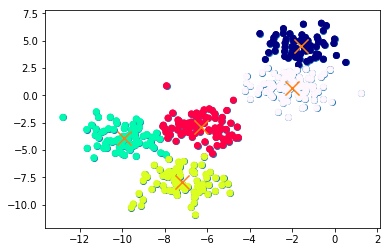

In [39]:
X, y = make_blobs(n_samples=400, centers=5, random_state=1)
scatter(X[:,0], X[:,1], c=y, cmap='gist_ncar')
savefig('five.png')
scatter(X[:,0], X[:,1])
savefig('justThePoints.png')

model = KMeans(n_clusters=5, random_state=1)
model.fit(X)
print model.cluster_centers_


# Plot the luster centers
scatter(X[:,0], X[:,1], c=model.labels_, cmap='gist_ncar')
scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker="x", s=200, linewidths=5)
savefig('Clustering_1_data/clusters.png')

# Naive Bayes

In [45]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
from sklearn import naive_bayes
from sklearn import metrics
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [49]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', 'marital_status', \
         'occupation', 'relationship', 'race', 'sex', 'capital_gain', 'capital_loss', \
         'hours_per_week', 'native_country', 'income_band']
df = pd.read_csv('adult.data', sep=', ', names=names)

#Create the target
df['target'] = 0.0
mask = (df['income_band'] == '>50K')
df['target'][mask] = 1.0

#Discritize continuous variables into bins
df['age_binned'] = pd.qcut(df['age'], 5)
df['fnlwgt_binned'] = pd.qcut(df['fnlwgt'], 5)
df['education_num_binned'] = pd.qcut(df['education_num'], 3)
df['capital_loss_binned'] = '0'
df['capital_loss_binned'][df['capital_loss'] > 0] = '>0'
df['capital_gain_binned'] = '0'
df['capital_gain_binned'][df['capital_gain'] > 0] = '>0'
df['hours_binned'] = '40'
df['hours_binned'][df['hours_per_week'] < 40] = '<40'
df['hours_binned'][df['hours_per_week'] > 40] = '>40'

categorical_columns = ['age_binned', 'workclass', 'fnlwgt_binned', 'education',
          'education_num_binned', 'marital_status', 'occupation', 'relationship',
          'race', 'sex', 'capital_gain_binned', 'capital_loss_binned', 'hours_binned']

#Create dummy variables
df_dummies = pd.get_dummies(df[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = df_dummies.columns.values
# Concatenate all these new dummy columns into the old dataframe
df2 = pd.concat([df, df_dummies], axis=1)

#Create dmatrices
formula = 'target ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))
Y, X = dmatrices(formula, df2, return_type='dataframe')
y = Y['target'].values

model = naive_bayes.MultinomialNB()
model.fit(X, y)

#Train Error
prediction_train = model.predict(X)
print metrics.accuracy_score(y, prediction_train)

# In the below code tweak it to create the train_test split


df_test = pd.read_csv('adult.test', sep=', ', names=names)

df_test['target'] = 0.0
mask = (df_test['income_band'] == '>50K')
df_test['target'][mask] = 1.0

df_test['age_binned'] = pd.qcut(df_test['age'], 5)
df_test['fnlwgt_binned'] = pd.qcut(df_test['fnlwgt'], 5)
df_test['education_num_binned'] = pd.qcut(df_test['education_num'], 3)

df_test['capital_loss_binned'] = '0'
df_test['capital_loss_binned'][df_test['capital_loss'] > 0] = '>0'

df_test['capital_gain_binned'] = '0'
df_test['capital_gain_binned'][df_test['capital_gain'] > 0] = '>0'

df_test['hours_binned'] = '40'
df_test['hours_binned'][df_test['hours_per_week'] < 40] = '<40'
df_test['hours_binned'][df_test['hours_per_week'] > 40] = '>40'

df_dummies = pd.get_dummies(df_test[categorical_columns],
                            prefix=categorical_columns,
                            columns=categorical_columns)
dummy_column_names = df_dummies.columns.values
df_test2 = pd.concat([df_test, df_dummies], axis=1)
formula = 'target ~ 0 + {}'.format(' + '.join(['Q("{}")'.format(x) for x in dummy_column_names]))

Y_test, X_test = dmatrices(formula, df_test2, return_type='dataframe')
y_test = Y_test['target'].values

# Test Error

prediction_test = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction_test)

0.8188937686189
0.8216325778514834


# Class Prior - Naive Bayes

In [51]:
print 'Prior probability for the negative class is',
print exp(model.class_log_prior_[0])
print 'Prior probability for the positive class is',
print exp(model.class_log_prior_[1])

# The most important/top features

feature_importances = abs(model.feature_log_prob_[1] - model.feature_log_prob_[0])
feature_importance_series = Series(feature_importances, index=X.columns.values)
print feature_importance_series.sort_values(ascending=False)[:10]

# Identify the sign of these top features
top_10_feature_indices = feature_importance_series.sort_values(ascending=False)[:10].index.values

inter_class_differences = model.feature_log_prob_[1] - model.feature_log_prob_[0]
new_feature_importance_series = Series(inter_class_differences, index=X.columns.values)

new_feature_importance_series[top_10_feature_indices]

Prior probability for the negative class is 0.7591904425539763
Prior probability for the positive class is 0.24080955744602456
Q("occupation_Priv-house-serv")      3.163088
Q("relationship_Own-child")          3.150375
Q("education_Preschool")             2.803533
Q("age_binned_(16.999, 26.0]")       2.527024
Q("education_Doctorate")             2.192427
Q("education_Prof-school")           2.160491
Q("relationship_Other-relative")     2.065888
Q("education_1st-4th")               2.000129
Q("occupation_Other-service")        1.983046
Q("marital_status_Never-married")    1.883267
dtype: float64


Q("occupation_Priv-house-serv")     -3.163088
Q("relationship_Own-child")         -3.150375
Q("education_Preschool")            -2.803533
Q("age_binned_(16.999, 26.0]")      -2.527024
Q("education_Doctorate")             2.192427
Q("education_Prof-school")           2.160491
Q("relationship_Other-relative")    -2.065888
Q("education_1st-4th")              -2.000129
Q("occupation_Other-service")       -1.983046
Q("marital_status_Never-married")   -1.883267
dtype: float64

# Logistic Regression

In [53]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


0.7237432675044884
0.7329842931937173


rate_marriage               -0.677880
religious                   -0.357538
C(occupation)[1.0]          -0.322409
age                         -0.062224
children                    -0.008744
educ                         0.004087
C(occupation_husb)[T.5.0]    0.022492
C(occupation_husb)[T.2.0]    0.028869
C(occupation_husb)[T.4.0]    0.040562
C(occupation_husb)[T.6.0]    0.109393
yrs_married                  0.113568
C(occupation_husb)[T.3.0]    0.114871
C(occupation)[2.0]           0.245544
C(occupation)[4.0]           0.415880
C(occupation)[3.0]           0.667964
C(occupation)[6.0]           0.873202
C(occupation)[5.0]           1.030847
dtype: float64

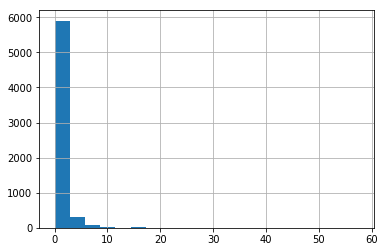

In [54]:
df = pd.read_csv('affairs.csv')
df['affairs'].hist(bins=20)

#Creating the target variable
df['target'] = 0.0
df['target'][df['affairs'] > 0] = 1.0

#Create design matrices

formula = 'target ~ 0 + rate_marriage + age + yrs_married + children ' + \
           ' + religious + educ + C(occupation) + C(occupation_husb)'

Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

#Split into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)\

#Model
model = LogisticRegression()
result = model.fit(X_train, y_train)

#Train Error
prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

#Test Error
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

# Feature weights
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

# Decision Trees

In [57]:
from pandas import Series, DataFrame
import pandas as pd
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, StratifiedKFold
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [59]:
names = ['age', 'workclass', 'fnlwgt', 'education', 'education_num', \
         'marital_status', 'occupation', 'relationship', 'race', 'sex', \
         'capital_gain', 'capital_loss', 'hours_per_week', \
         'native_country', 'income_band']
df = pd.read_table('adult.data', sep=', ', names=names)

#Create the target
df['target'] = 0.0
mask = (df['income_band'] == '>50K')
df['target'][mask] = 1.0

#Create design matrices
formula = 'target ~ 0 + age + workclass + fnlwgt + education + education_num + ' \
          'marital_status + occupation + relationship + race + sex + ' \
          'capital_gain + capital_loss + hours_per_week'
Y, X = dmatrices(formula, df, return_type='dataframe')
y = Y['target'].values

#Split into train-test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Create the folds in the training data
kfold = StratifiedKFold(n_splits=3, shuffle=True)

# Iterate over max_depth
for max_depth in [1, 2, 3, 4, 5]:
    model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=max_depth)
    scores = cross_val_score(model3, X_train, y_train, cv=kfold)
    print 'max_depth={} scores={} avg_score={}'.format(max_depth, scores, scores.mean())
    
#Fit with the best max_depth
model3 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)
result = model3.fit(X_train, y_train)

#Train Error
prediction_train = model3.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

#Test Error
prediction = model3.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

max_depth=1 scores=[0.75335615 0.75332368 0.75332368] avg_score=0.753334502385
max_depth=2 scores=[0.82627007 0.80057918 0.82269317] avg_score=0.816514138473
max_depth=3 scores=[0.84259016 0.84125313 0.84164802] avg_score=0.841830433498
max_depth=4 scores=[0.84561727 0.83980519 0.84006845] avg_score=0.841830300677
max_depth=5 scores=[0.84245854 0.84270107 0.85112544] avg_score=0.845428350729
0.8418743418743418
0.8481932644078206


# Linear Regression

In [61]:
from pandas import Series, DataFrame
import pandas as pd
import statsmodels.api as sm
from patsy import dmatrices
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
guerry = pd.read_csv('Guerry.csv', index_col=0).dropna()
# Subset of data

guerry = guerry[['Department', 'Lottery', 'Literacy', 'Wealth', 'Region']]

# Create desgin matrices
y, X = dmatrices('Lottery ~ Literacy', data=guerry, return_type='dataframe')

# Run model

model = sm.OLS(y, X)
result = model.fit()
print result.summary()
print result.params
print result.rsquared
print result.pvalues

                            OLS Regression Results                            
Dep. Variable:                Lottery   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     14.16
Date:                Wed, 15 Aug 2018   Prob (F-statistic):           0.000312
Time:                        23:47:40   Log-Likelihood:                -386.13
No. Observations:                  85   AIC:                             776.3
Df Residuals:                      83   BIC:                             781.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     64.2389      6.163     10.423      0.0

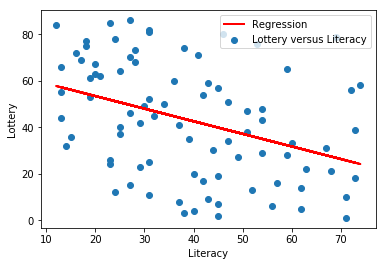

In [70]:
x = guerry['Literacy']
y_actual = guerry['Lottery']
y_expected = result.params['Intercept'] + result.params['Literacy'] * x

scatter(x=x, y=y_actual, label='Lottery versus Literacy')
plot(x, y_expected, color='red', linewidth=2, label='Regression')
xlabel('Literacy')
ylabel('Lottery')
legend(loc='best')